Sleek Home Assignment:

In this notebook I will review the CICIDS2017 dataset.
First I upload the data and create one data frame with all samples from different days.


In [1]:
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns


path = '/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCVE'
all_files = glob.glob((path+ "/*.csv"))
all_f = []
file_type = ["Friday_DDOS", "Friday_PCAP", "Friday_Morning", "Monday_PCAP", "Thu_PCAP_Afternoon", "Thu_PCAP_Morning","TUE_PCAP", "WED_PCAP"]
i=0
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    df["type"] = file_type[i]
    all_f.append(df)

data = pd.concat(all_f, axis=0, ignore_index=True)
print(data.shape)

(2830743, 80)


A quick look at the data and some statistics

In [2]:
data.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,type
0,22,1266342,41,44,2664,6954,456,0,64.975610,109.864573,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,Friday_DDOS
1,22,1319353,41,44,2664,6954,456,0,64.975610,109.864573,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,Friday_DDOS
2,22,160,1,1,0,0,0,0,0.000000,0.000000,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,Friday_DDOS
3,22,1303488,41,42,2728,6634,456,0,66.536585,110.129945,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,Friday_DDOS
4,35396,77,1,2,0,0,0,0,0.000000,0.000000,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,Friday_DDOS


In [3]:
data.describe().round().T

/opt/conda/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/opt/conda/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,count,mean,std,min,25%,50%,75%,max
Destination Port,2830743.0,8071.0,18284.0,0.0,53.0,80.0,443.0,65535.0
Flow Duration,2830743.0,14785664.0,33653744.0,-13.0,155.0,31316.0,3204828.0,119999998.0
Total Fwd Packets,2830743.0,9.0,750.0,1.0,2.0,2.0,5.0,219759.0
Total Backward Packets,2830743.0,10.0,997.0,0.0,1.0,2.0,4.0,291922.0
Total Length of Fwd Packets,2830743.0,549.0,9994.0,0.0,12.0,62.0,187.0,12900000.0
...,...,...,...,...,...,...,...,...
Active Min,2830743.0,58296.0,577092.0,0.0,0.0,0.0,0.0,110000000.0
Idle Mean,2830743.0,8316037.0,23630079.0,0.0,0.0,0.0,0.0,120000000.0
Idle Std,2830743.0,503844.0,4602984.0,0.0,0.0,0.0,0.0,76900000.0
Idle Max,2830743.0,8695752.0,24366888.0,0.0,0.0,0.0,0.0,120000000.0


It seems that there are few invalid values and also many columns which are only zeros. That is not informative at all. so I remove those columns.

In [5]:
col_remove = []
for i in range(0,data.shape[1]):
    if (data.iloc[:,i] == 0).all():
        col_remove.append(data.columns[i])
        
data = data.drop(col_remove, axis=1)
data = data.drop_duplicates()
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data = data.dropna()
data.shape
data.describe().round().T

,count,mean,std,min,25%,50%,75%,max
Destination Port,2520798.0,8691.0,19013.0,0.0,53.0,80.0,443.0,65535.0
Flow Duration,2520798.0,16591611.0,35232763.0,-13.0,208.0,50622.0,5333340.0,119999998.0
Total Fwd Packets,2520798.0,10.0,794.0,1.0,2.0,2.0,6.0,219759.0
Total Backward Packets,2520798.0,12.0,1057.0,0.0,1.0,2.0,5.0,291922.0
Total Length of Fwd Packets,2520798.0,612.0,10588.0,0.0,12.0,66.0,332.0,12900000.0
...,...,...,...,...,...,...,...,...
Active Min,2520798.0,65464.0,611158.0,0.0,0.0,0.0,0.0,110000000.0
Idle Mean,2520798.0,9337367.0,24848183.0,0.0,0.0,0.0,0.0,120000000.0
Idle Std,2520798.0,565794.0,4874169.0,0.0,0.0,0.0,0.0,76900000.0
Idle Max,2520798.0,9763770.0,25617458.0,0.0,0.0,0.0,0.0,120000000.0


Next I need to understand what is the ration of each class we have. As we can see from the graph below, we have many samples from benign class. This means we have a case of imbalanced dataset.

In [6]:
class_counts = data[' Label'].value_counts()
print(class_counts)

 Label
BENIGN                        2095057
DoS Hulk                       172846
DDoS                           128014
PortScan                        90694
DoS GoldenEye                   10286
FTP-Patator                      5931
DoS slowloris                    5385
DoS Slowhttptest                 5228
SSH-Patator                      3219
Bot                              1948
Web Attack � Brute Force         1470
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64


Next I will check the correlation between all pairs of features to better understand the data and see if there are features that have the same information and can be removed.

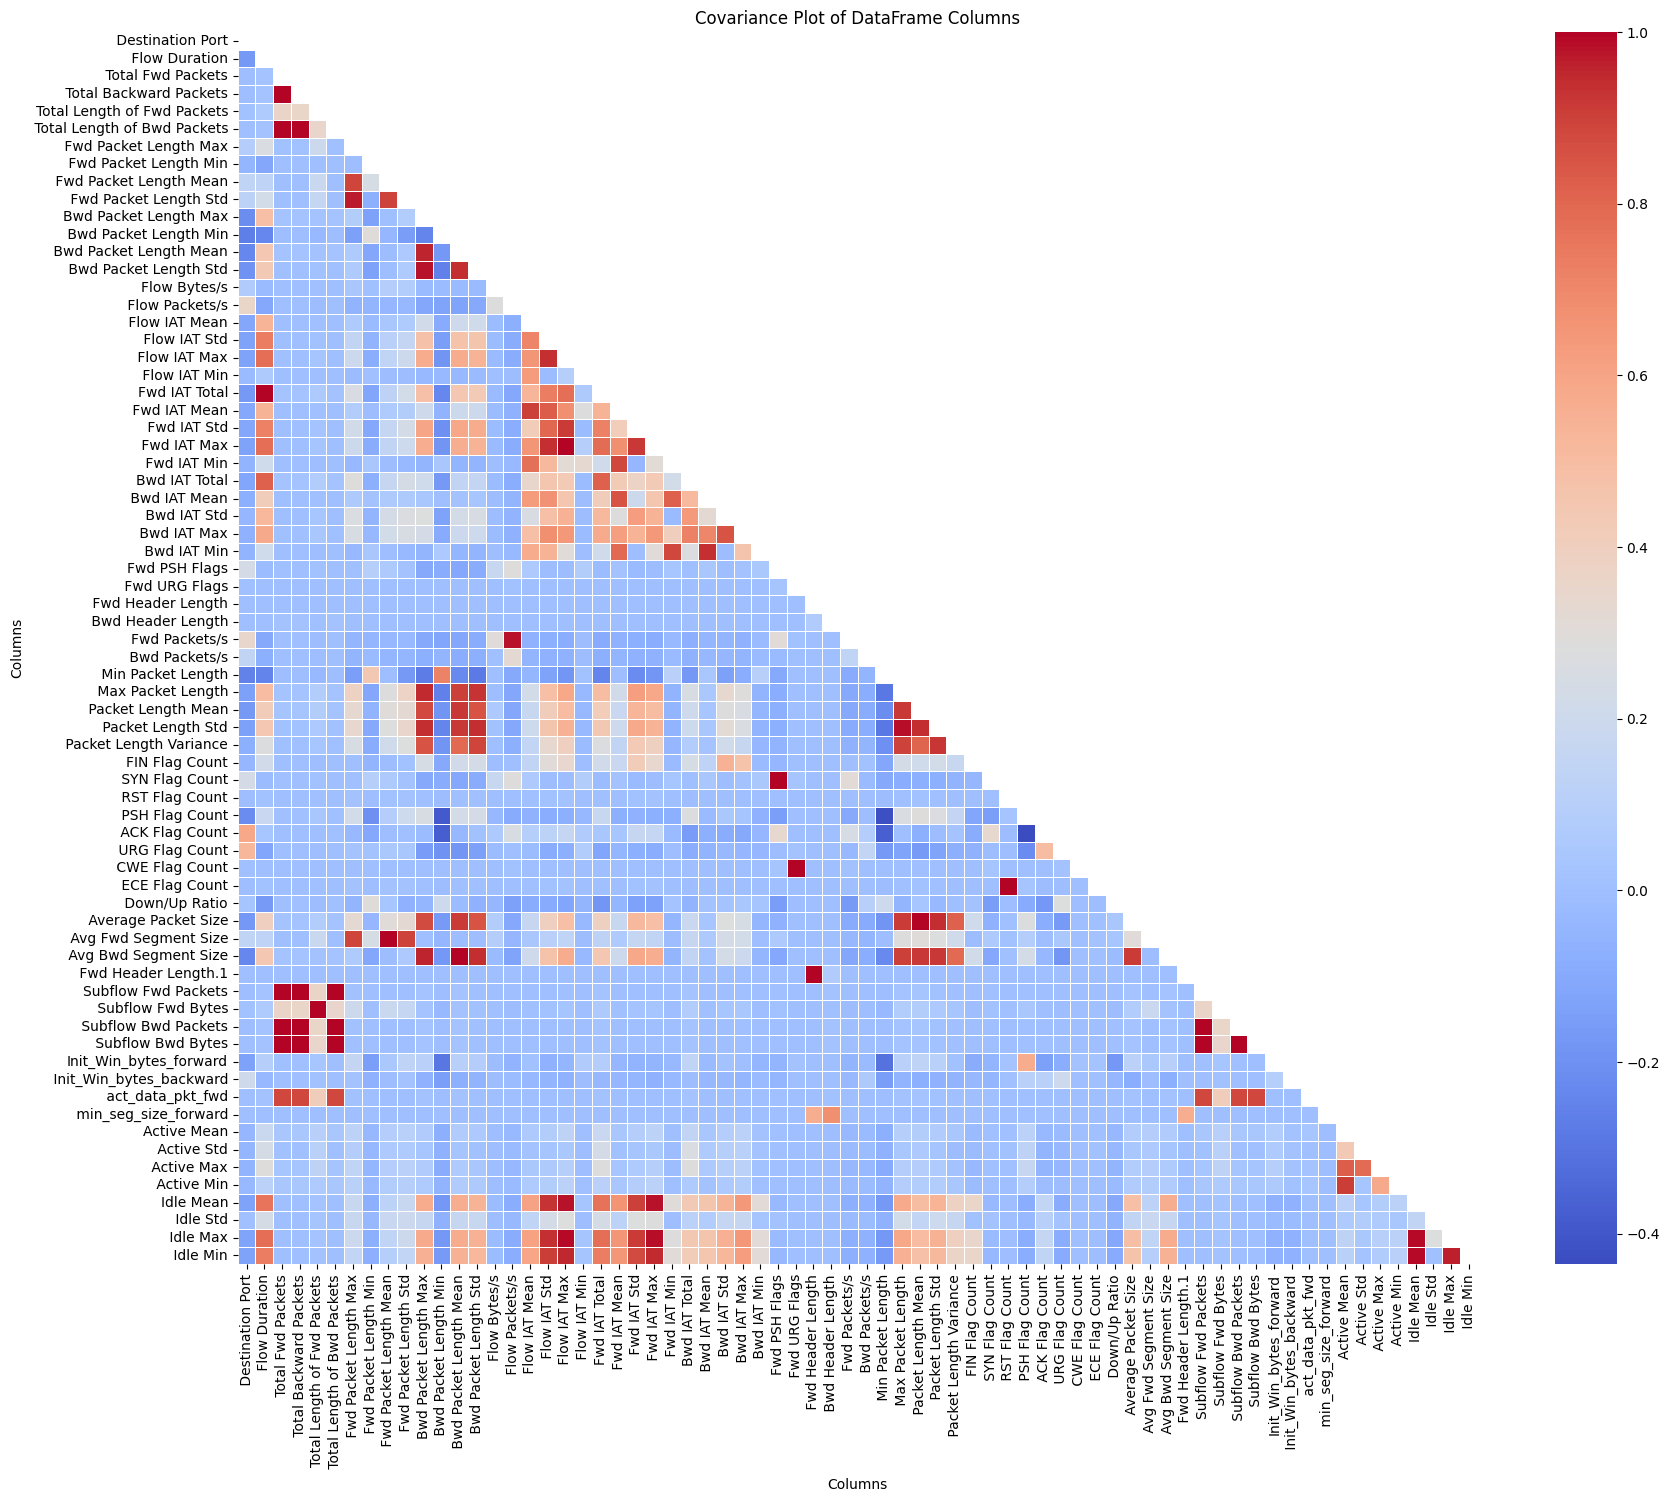

In [7]:
correlation_matrix = data.drop([' Label','type'],axis =1 ).corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=.5, mask=mask, )
plt.title('Covariance Plot of DataFrame Columns')
plt.xlabel('Columns')
plt.ylabel('Columns')
plt.show()

It seems that there are many features with very high correlation. Since I don't need the same information twice, I will remove all features with correlation of 0.99 and above.

In [8]:
d= []
for row in range(correlation_matrix.shape[0]):
    for col in range(correlation_matrix.shape[1]):
        if row != col:
            if correlation_matrix.iloc[row,col] >= 0.99:
                d.append({'column1':data.columns[row],  'column2':data.columns[col]})

df_columns_high_cor = pd.DataFrame(d)
column_remove = df_columns_high_cor['column1'].tolist()
print(df_columns_high_cor)

                         column1                       column2
0                  Flow Duration                 Fwd IAT Total
1              Total Fwd Packets        Total Backward Packets
2              Total Fwd Packets   Total Length of Bwd Packets
3              Total Fwd Packets           Subflow Fwd Packets
4              Total Fwd Packets           Subflow Bwd Packets
5              Total Fwd Packets             Subflow Bwd Bytes
6         Total Backward Packets             Total Fwd Packets
7         Total Backward Packets   Total Length of Bwd Packets
8         Total Backward Packets           Subflow Fwd Packets
9         Total Backward Packets           Subflow Bwd Packets
10        Total Backward Packets             Subflow Bwd Bytes
11   Total Length of Fwd Packets             Subflow Fwd Bytes
12   Total Length of Bwd Packets             Total Fwd Packets
13   Total Length of Bwd Packets        Total Backward Packets
14   Total Length of Bwd Packets           Subflow Fwd 

In [9]:
data.drop(column_remove, axis=1, inplace=True)
print(data.shape)

(2520798, 43)


In the next step I will split the data into train and test and create a classieir. Before that I will use demsional reduction method to better understand which features has high variance.

In [11]:
from sklearn.model_selection import train_test_split

X = data.drop([' Label','type'],axis =1)
y = data[' Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
y_train_clf = [0 if x == 'BENIGN' else 1 for x in y_train]

I am using PCA to get a grasp of the data and the ability to separate BENIGN and malicious by performing PCA we can see that now much is explained with PCA components. the reason for that is probably due to the sparse data we have. therefore I will use the SVD Truncated method.

[0.18593203 0.11637504 0.07734207 0.07532167 0.05442534]


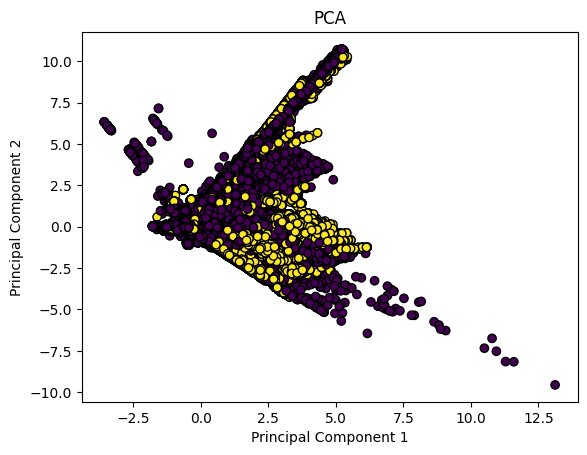

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_components=5, whiten=True))])
X_pca = pipeline.fit_transform(X_train)
print(pipeline['pca'].explained_variance_ratio_)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train_clf, cmap='viridis', edgecolor='k')
plt.title('PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Now I will try also SVD Truncated method. Here we can see that the truncated SVD method has managed to capture better understanding of the data variance. therefore I will use it to transform the data and use it as input run my classifier

[0.4974169  0.26992543 0.11553341 0.06064612 0.02984891]


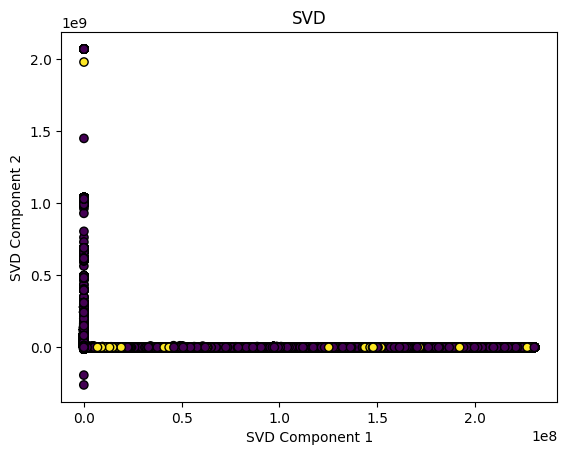

In [16]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=5, n_iter=7, random_state=42)
X_reduced = svd.fit_transform(X_train)
print(svd.explained_variance_ratio_)

# Plot the results
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_train_clf, cmap='viridis', edgecolor='k')
plt.title('SVD')
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.show()

Now I will look which features got the highest weight in the Tracuated SVD and select them as input to the classifier

41


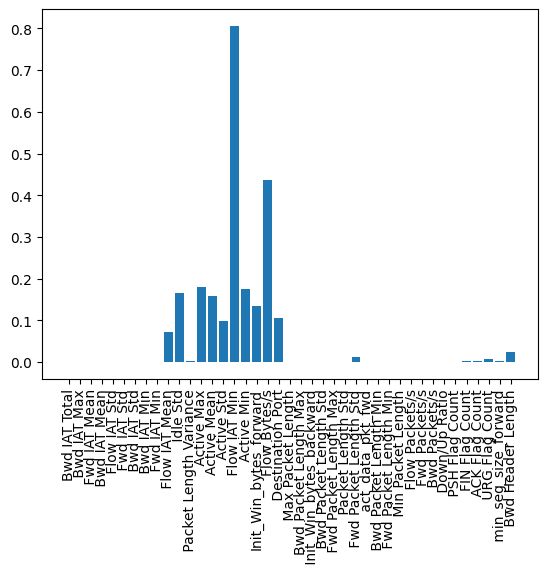

In [18]:
best_features = [X_train.columns[i] for i in svd.components_[0].argsort()[::-1]]

import matplotlib.pyplot as plt
print(len(svd.components_[0]))
plt.bar(best_features,svd.components_[0])
plt.xticks(rotation=90)
plt.show()


we can see 10 features that got siginificantly higher weights. I will use them for the classifier

In [20]:
X_xgb = X_train[best_features[:10]]
print(X_xgb.columns)
print(X_xgb.shape)

Index(['Bwd IAT Total', ' Bwd IAT Max', ' Fwd IAT Mean', ' Bwd IAT Mean',
       ' Flow IAT Std', ' Fwd IAT Std', ' Bwd IAT Std', ' Bwd IAT Min',
       ' Fwd IAT Min', ' Flow IAT Mean'],
      dtype='object')
(1890598, 10)


I will use xgboost for classification

In [28]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


model = xgb.XGBClassifier()

pipeline = Pipeline([
        ('model', model)
    ])

param_grid = {
        'model__max_depth': [20],
        'model__n_estimators': [300]
    }

grid = GridSearchCV(pipeline, param_grid, cv=10, n_jobs=-1, scoring='accuracy')
grid.fit(X_xgb, y_train_clf)

mean_score = grid.cv_results_["mean_test_score"][grid.best_index_]
std_score = grid.cv_results_["std_test_score"][grid.best_index_]

print(f"Best parameters: {grid.best_params_}")
print(f"Mean CV score: {mean_score: .6f}")
print(f"Standard deviation of CV score: {std_score: .6f}")

Best parameters: {'model__max_depth': 20, 'model__n_estimators': 300}
Mean CV score:  0.958129
Standard deviation of CV score:  0.000286


I got a nice score of accuracy=0.958. let's see if the test set gets a similar score. if the test set will get much less, we might have overfitting of the classifier. 

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
selected_model = grid.best_estimator_
y_pred = selected_model.predict(X_test[best_features[:10]])
y_true = [0 if x == 'BENIGN' else 1 for x in y_test]
print("test accuracy "+str(accuracy_score(y_true, y_pred)))
print("test f1 score "+ str(f1_score(y_true, y_pred, average='weighted')))

test accuracy 0.9583751190098382
test f1 score 0.956735352007874


Now, let's look on the feature importance of the xgboost classifier. that will indicate which features differentiate the most between BENIGN and malicious.

<Axes: >

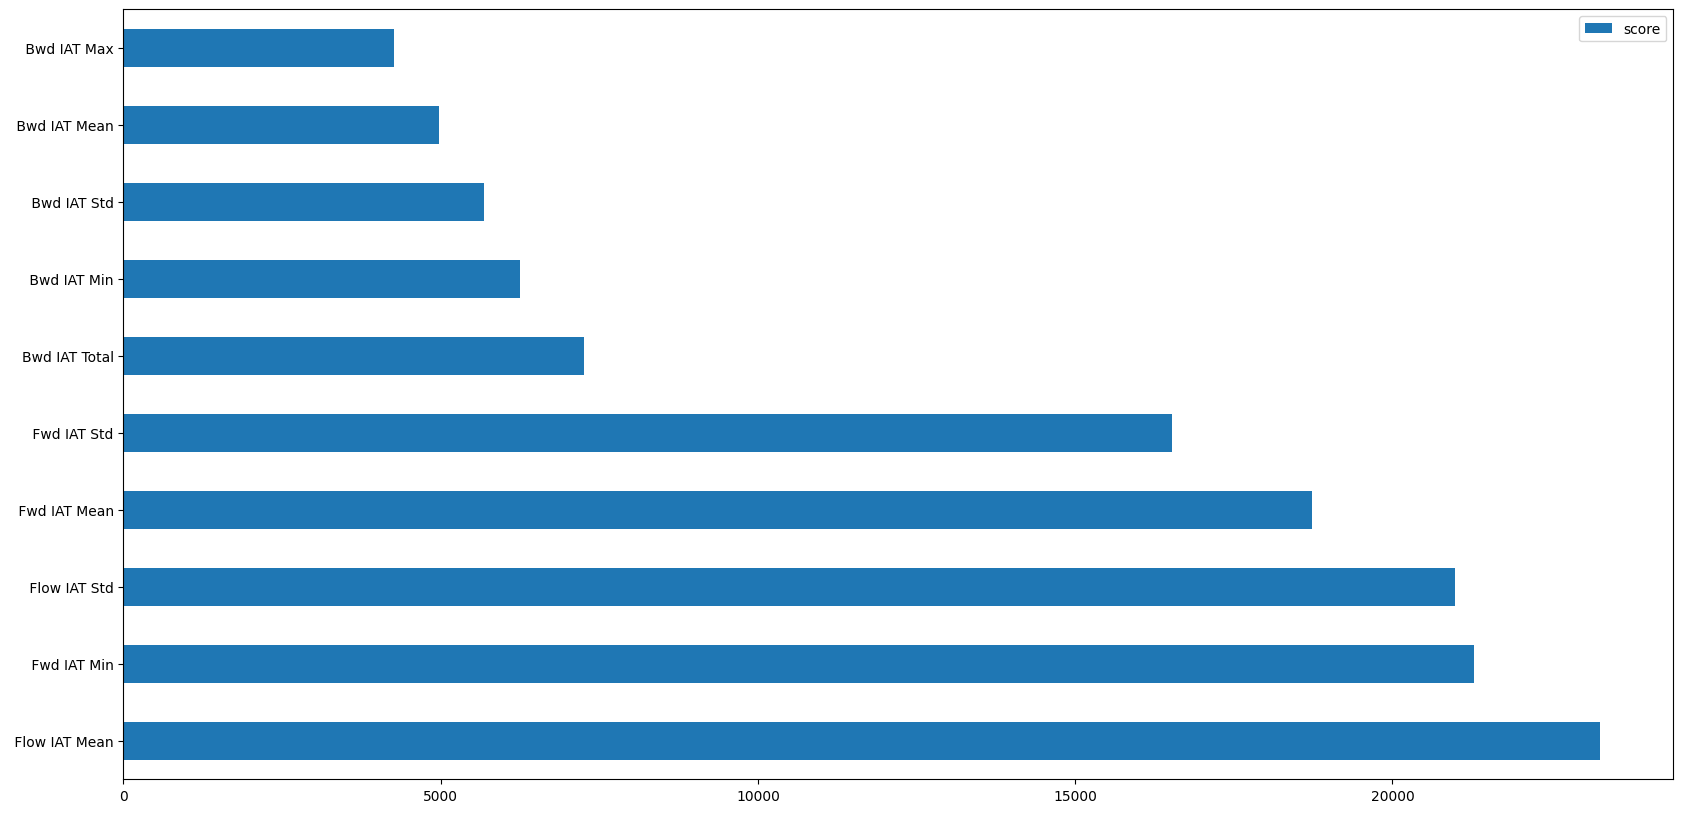

In [33]:
selected_model = grid.best_estimator_
feature_important = selected_model['model'].get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10))

To summarize, here are my main conclusions:

1. Many columns in the data have zeros. In addition, some had invalid values while others had the same value for all samples. All those rows and features were removed.
2. Many features were almost identical with correlation >= 0.99
4. PCA did not capture the variance of the data. ~0.1 of explained variance in the first component. probably because of the data's sparsity. While truncated SVD performed better and captured ~0.4 of the variance in its first component. 
5. features which had contributed the most to data variance are: ['Bwd IAT Total', ' Bwd IAT Max', ' Fwd IAT Mean', ' Bwd IAT Mean',
       ' Flow IAT Std', ' Fwd IAT Std', ' Bwd IAT Std', ' Bwd IAT Min',
       ' Fwd IAT Min', ' Flow IAT Mean']
 6. xgboost was able to manage the imbalanced data with an accuracy of ~0.958. 
 7. features that contributed the most to the classification are derived from Fwd IAT and Flow IAT
 8. The next steps should include a more in-depth investigation of the features. In addition, anomaly detection approaches like isolation forest and one class SVM. would be also interesting to try and create a classification between malware types.

